In [29]:
import tensorflow as tf
import keras 
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [90]:
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

# Keras dataset
from keras.datasets import mnist

# Keras utils
from keras.utils import np_utils

# keras functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [117]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28
There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


In [118]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_train.min(), x_train.max()

(0.0, 1.0)

In [115]:
INPUT = Input(shape= (784,))
print(INPUT)

f_1 = Dense(500, activation='relu')

f_21 = Dense(200, activation='relu')
f_22 = Dense(200, activation='relu')
f_23 = Dense(200, activation='relu')

f_3 = Dense(300, activation='relu')

f_41 = Dense(100, activation='relu')
f_42 = Dense(100, activation='relu')

f_5 = Dense(10, activation = 'softmax')

print(f_21)

Tensor("input_24:0", shape=(?, 784), dtype=float32)


In [127]:
h_1 = f_1(INPUT)

h_21 = f_21(h_1)
h_22 = f_22(h_1)
h_23 = f_23(h_1)


h_3 = f_3(concatenate([h_21,h_22,h_23]))

h_41 = f_41(h_3)
h_42 = f_42(h_3)

h_5 = f_5(concatenate([h_41,h_42]))

m = Model(INPUT, h_5)


m.summary()
m.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_167 (Dense)               (None, 500)          392500      input_24[0][0]                   
__________________________________________________________________________________________________
dense_168 (Dense)               (None, 200)          100200      dense_167[0][0]                  
__________________________________________________________________________________________________
dense_169 (Dense)               (None, 200)          100200      dense_167[0][0]                  
__________________________________________________________________________________________________
dense_170 

In [134]:
model_his = m.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1, shuffle=True )

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.0756 - acc: 0.9777 - val_loss: 0.0752 - val_acc: 0.9797
Epoch 2/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.0586 - acc: 0.9823 - val_loss: 0.0855 - val_acc: 0.9777
Epoch 3/10
54000/54000 [==============================] - 9s 172us/step - loss: 0.0495 - acc: 0.9852 - val_loss: 0.0643 - val_acc: 0.9812
Epoch 4/10
54000/54000 [==============================] - 9s 168us/step - loss: 0.0428 - acc: 0.9875 - val_loss: 0.0946 - val_acc: 0.9773
Epoch 5/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0890 - val_acc: 0.9793
Epoch 6/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.0340 - acc: 0.9905 - val_loss: 0.0780 - val_acc: 0.9825
Epoch 7/10
54000/54000 [==============================] - 9s 173us/step - loss: 0.0302 - acc: 0.9913 - val_loss: 0.0682 - v

In [135]:
score = m.evaluate(x_test,y_test)
print('score %lf'%score[1])

10000/10000 [==============================] - 1s 51us/step
score 0.980300


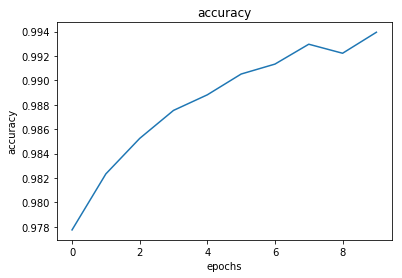

In [138]:
plt.plot(model_his.history['acc'])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [143]:
from keras.utils.vis_utils import plot_model
plot_model(m, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

![model](model_plot.png)

During the planning process, I found that there may be circumstances that the net cannot be supported by the amount of dataset. This occurs when I have params more than 1.1 million. 